# **Advanced Text Representation Techniques**

These methods use **neural networks** and **embedding models** to capture **semantic meaning** and **context** of words.  
They represent words as **dense vectors** where similar words have similar vector values.

#### **Key Characteristics**
- Capture **semantic relationships** between words  
- Lower-dimensional and dense representations  
- Useful for deep learning and modern NLP tasks  
- Require more computational resources  

#### **Common Advanced Techniques**
- **Word2Vec**, **GloVe**, **FastText** → Static word embeddings  
- **BERT**, **GPT**, **ELMo**, **T5** → Contextual embeddings (understand word meaning in context)

## **Word2Vec**

**Word2Vec** is a neural network-based model developed by **Tomas Mikolov (Google, 2013)** that learns to represent words as **dense, continuous vectors** (embeddings).  
Unlike Bag of Words or TF–IDF (which are sparse and count-based), Word2Vec captures **semantic relationships** between words — i.e., words with similar meanings have **similar vector representations**.

The main intuition behind Word2Vec:
> “You shall know a word by the company it keeps.” — *J.R. Firth (1957)*

This means words appearing in similar **contexts** tend to have **similar meanings**.

Word2Vec captures analogical relationships:  
vec("king") - vec("man") + vec("woman") ≈ vec("queen")  

This shows that vector differences encode **semantic meaning** (e.g., gender, tense, relationships).


### Architecture

Word2Vec uses a **shallow, two-layer neural network** to learn embeddings from large corpora.  
There are **two main training architectures**:

1. **CBOW (Continuous Bag of Words)**
- Predicts a **target word** from its **context words**.
- Example:  
  Input: “the ___ is barking” → Output: “dog”
- **Faster** and works well for **small datasets**.

2. **Skip-Gram**
- Predicts **context words** from a **target word**.
- Example:  
  Input: “dog” → Output: “the”, “is”, “barking”
- **Better for rare words** and large datasets.

| Model | Predicts | Best For | Speed |
|--------|-----------|-----------|--------|
| **CBOW** | Target from context | Frequent words | Faster |
| **Skip-Gram** | Context from target | Rare words | Slower but better quality |

### Output — Word Embeddings

Each word is represented as a **dense vector** (e.g., 100 or 300 dimensions) in continuous space.  
Words with **similar meanings** or **grammatical roles** are **closer together** in this space.

 * **Advantages**
    - Captures **semantic and syntactic relationships**  
    - Produces **dense**, low-dimensional embeddings  
    - Enables **vector arithmetic** with meaning (e.g., “king - man + woman = queen”)

* **Limitations**
  - Requires **large datasets** to train well  
  - Context is **static** — one vector per word (same embedding for “bank” = river bank / money bank)
  - Replaced in modern NLP by **contextual embeddings** (e.g., BERT, GPT)

### **Training Word2Vec using Gensim**

In [2]:
# importing libraries

import gensim
import pandas as pd

Dataset Download link: [Cell Phone & Accessories](https://drive.google.com/file/d/1nQODzlRM1S1bgKgOCz9IFFXEbFtfeqKm/view?usp=drive_link)

In [3]:
# reading the data

df = pd.read_json('./data/Cell_Phones_and_Accessories_5.json', lines=True)
print(f"Shape of the data is: {df.shape}")
df.head()

Shape of the data is: (194439, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [4]:
# We only deal with the Review Text

df['reviewText'][0] # sample text

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [5]:
# simple text preprocessing and tokenization

review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [6]:
review_text

0         [they, look, good, and, stick, good, just, don...
1         [these, stickers, work, like, the, review, say...
2         [these, are, awesome, and, make, my, phone, lo...
3         [item, arrived, in, great, time, and, was, in,...
4         [awesome, stays, on, and, looks, great, can, b...
                                ...                        
194434    [works, great, just, like, my, original, one, ...
194435    [great, product, great, packaging, high, quali...
194436    [this, is, great, cable, just, as, good, as, t...
194437    [really, like, it, becasue, it, works, well, w...
194438    [product, as, described, have, wasted, lot, of...
Name: reviewText, Length: 194439, dtype: object

In [7]:
review_text.loc[9]

['this',
 'is',
 'fantastic',
 'case',
 'very',
 'stylish',
 'and',
 'protects',
 'my',
 'phone',
 'easy',
 'access',
 'to',
 'all',
 'buttons',
 'and',
 'features',
 'without',
 'any',
 'loss',
 'of',
 'phone',
 'reception',
 'but',
 'most',
 'importantly',
 'it',
 'double',
 'power',
 'just',
 'as',
 'promised',
 'great',
 'buy']

Training the Word2Vec model

In [8]:
# initializing the model

model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)

In [9]:
# building the vocabulary

model.build_vocab(review_text, progress_per=1000)

In [10]:
# training the model

model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(61503233, 83868975)

In [11]:
# saving the model

model.save('./amz_reviews_Word2Vec.model')

In [12]:
# finding similar words

model.wv.most_similar('hungry')

[('consumption', 0.7199212312698364),
 ('reserve', 0.7054067850112915),
 ('supplies', 0.6984509229660034),
 ('outages', 0.6658194065093994),
 ('hog', 0.6641326546669006),
 ('yubi', 0.6632001399993896),
 ('banks', 0.6599622368812561),
 ('outage', 0.6451557874679565),
 ('pak', 0.6412122249603271),
 ('hogs', 0.626966118812561)]

In [13]:
model.wv.most_similar('sorry')

[('convinced', 0.5606070756912231),
 ('saying', 0.5592935681343079),
 ('betting', 0.5550550222396851),
 ('dud', 0.5534123182296753),
 ('asking', 0.5527914762496948),
 ('purchaser', 0.5508798956871033),
 ('please', 0.5421678423881531),
 ('mad', 0.5380898714065552),
 ('anyway', 0.5353903770446777),
 ('awaiting', 0.5289912819862366)]

In [14]:
model.wv.most_similar('happy')

[('pleased', 0.9425526261329651),
 ('satisfied', 0.9303296208381653),
 ('impressed', 0.8213702440261841),
 ('unhappy', 0.8177497982978821),
 ('thrilled', 0.782372772693634),
 ('delighted', 0.7802542448043823),
 ('satified', 0.7699121832847595),
 ('disappointed', 0.7676931023597717),
 ('satisified', 0.7406805157661438),
 ('dissapointed', 0.726333498954773)]

In [15]:
# finding the similarity score

model.wv.similarity(w1='good', w2='great')

0.78979

In [16]:
model.wv.similarity(w1='sad', w2='joy')

0.22956853

In [17]:
model.wv.similarity(w1='broken', w2='smashed')

0.57057846

### **Using Pretrained Google Word2Vec model**

In [16]:
# importing libraries

import gensim.downloader as api
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# downloading the model

'''
Download and load the pre-trained model (GoogleNews-vectors-negative300)
This model is 300-dimensional and trained on about 100 billion words from the Google News dataset. It is about 3.6 GB.
'word2vec-google-news-300' is the key for Google's Word2Vec model
The result is a KeyedVectors instance
'''

print("Downloading and loading the model...")
try:
  model: KeyedVectors = api.load('word2vec-google-news-300')
  print("Model loaded successfully.")

except Exception as e:
    print(f"\nAn error occurred.")
    print(f"Error: {e}")

Model loaded successfully.


In [11]:
# finding vector of a word

vector = model['king']
print(f"Vector for 'king' has {len(vector)} dimentions")

Vector for 'king' has 300 dimentions


In [12]:
# solving a simple word analogy

analogy_result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print("Analogy: 'king' - 'man' + 'woman' = ?")
print(f"  {analogy_result[0][0]}: {analogy_result[0][1]:.4f}")

Analogy: 'king' - 'man' + 'woman' = ?
  queen: 0.7118


In [13]:
# Calculate similarity between two words

similarity_score = model.similarity('cat', 'dog')
print(f"\nSimilarity between 'cat' and 'dog': {similarity_score:.4f}")


Similarity between 'cat' and 'dog': 0.7609


In [18]:
# observing the vectors in 2D space

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

In [ ]:
words = ['king', 'queen', 'man', 'woman', 'horse']
output_filename = 'word2vec_pca_visualization.png'

vectors = []
labels = []

for word in words:
    if word in model:
        vectors.append(model[word])
        labels.append(word)
    else:
        print(f"Warning: '{word}' not found in the vocabulary and will be skipped.")


Visualization saved successfully as 'word2vec_pca_visualization.png'


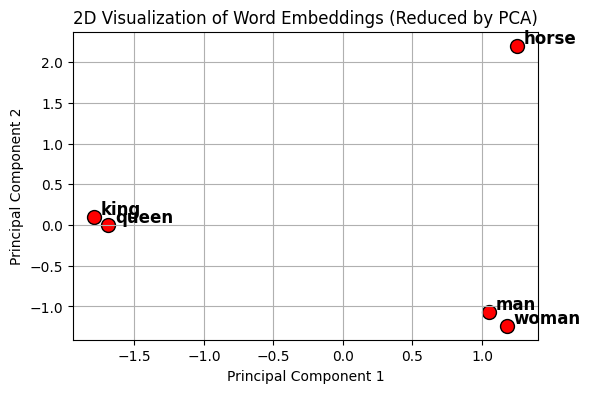

In [20]:
if not vectors:
    print("Error: No words could be found in the model vocabulary to plot.")
else:
    X = np.array(vectors)

    pca = PCA(n_components=2)

    X_2d = pca.fit_transform(X)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], edgecolors='k', c='r', s=100)

    # Add labels for each point
    for i, label in enumerate(labels):
        plt.annotate(
            label,
            xy=(X_2d[i, 0], X_2d[i, 1]),
            xytext=(5, 2),
            textcoords='offset points',
            fontsize=12,
            weight='bold'
        )

    plt.title('2D Visualization of Word Embeddings (Reduced by PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    
    # Save the plot
    plt.savefig(output_filename)
    print(f"\nVisualization saved successfully as '{output_filename}'")

## **Glove**

**GloVe (Global Vectors)** is an **unsupervised word embedding model** developed by **Stanford University**.  
It combines the advantages of **global matrix factorization** (like LSA) and **local context window methods** (like Word2Vec).

The main idea:
> Words that appear in **similar contexts** have **similar meanings**.

- GloVe constructs a **word co-occurrence matrix**, where each entry counts how often words co-occur within a specific context window.  
- Then, it uses **matrix factorization** to learn word vectors that capture these co-occurrence relationships.

**Advantages**
- Captures **global statistical information**  
- Produces **meaningful, dense embeddings**  
- Works well for **semantic similarity** and **analogy tasks**

**Limitations**
- Requires large co-occurrence matrices  
- Context is **static** — one embedding per word (no polysemy handling)


In [33]:
# code implementation using gensim (using pretrained model)

# imports
import gensim
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

import gensim.downloader as api

In [34]:
# sample vocabulary

vocab = ['apple','orange','shimla','banana','maruti','mumbai','china','india','husband'
            ,'wife','brother','sister','red','yellow','computer','mobile','pear','guava']

In [35]:
# loading the pretrained model

try:
    print("Downloading the model .....")
    glove_model = api.load('glove-wiki-gigaword-300')
    print("Model downloaded and ready to use")
except Exception as e:
    print(f"Error: {e}")

[==================================================] 100.0% 376.1/376.1MB downloaded
Model downloaded and ready to use


In [36]:
# testing the model
# extracting the similar words


glove_model.most_similar('happy', topn=5)

[("'m", 0.7080122232437134),
 ('glad', 0.6905031800270081),
 ('pleased', 0.6712467074394226),
 ('really', 0.6575899124145508),
 ('always', 0.6494665741920471)]

In [40]:
# similarity analogy

result = glove_model.most_similar(positive=['woman', 'husband'], negative=['man'], topn=1)[0]
print('hustand - man + woman = ?')
print(f"{result[0]} - {result[1]}")

hustand - man + woman = ?
wife - 0.7732622027397156


In [42]:
# visualizing the vocab words

words = []
vectors = []

for word in vocab:
    words.append(word)
    vectors.append(glove_model[word])


In [44]:
# reducing dimention to 2D for visualization

dim_model = TSNE(
    n_components=2,
    perplexity=3,
    init='pca',
    random_state=42
)

fit_model = dim_model.fit_transform(np.array(vectors))

In [45]:
fit_model.shape

(18, 2)

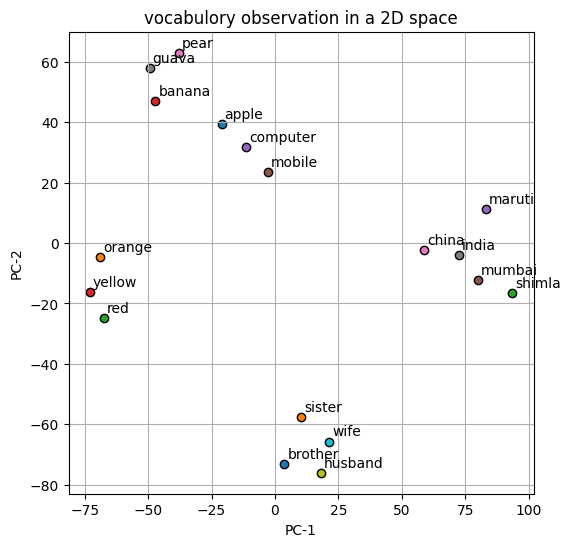

In [50]:
x=[]
y=[]

for i in fit_model:
    x.append(i[0])
    y.append(i[1])

plt.figure(figsize=(6, 6))

for i in range(len(x)):
    plt.scatter(x[i], y[i], edgecolors='k')
    plt.annotate(
        words[i],
        xy=(x[i], y[i]),
        xytext=(2, 2),
        textcoords='offset points',
        ha='left',
        va='bottom'
    )
plt.title('vocabulory observation in a 2D space')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.grid(True)
plt.show()

* We can observe the semantic clusters